#  Сохранение и дальнейшая работа с графиком

В для воспроизводимости графиков есть два подхода

* Универсальный: 
    * создаём пайплан генерации данных
    * сохраняем график в jpeg, png...
* Удобный: сериализация графика с помощью модуля pickle.

Первый вариант предпочтительнее всегда. 
Второй вариант, кооторый сохраняет график в бинарном формате с помощью *pickle* может привести к ситуации, когда вы не сможете распаковать сохраннённый график, не пользуйтесь им.

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

air_df = pd.read_csv('./data/air_quality.tar.gz', compression='gzip', sep=';', encoding='utf8')
air_df = air_df[air_df.iloc[:,0].notnull()]

# формируем столбец с таймстемпом
air_df['ts'] = (air_df.iloc[:,0]+ ' ' + air_df.iloc[:,1]).map(
    lambda x: datetime.strptime(x.replace('.',':'), "%d/%m/%Y %H:%M:%S")
)

air_df.head()

air_quality.csv      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0      10/03/2004  18.00.00    2,6       1360.0     150.0     11,9   
1      10/03/2004  19.00.00      2       1292.0     112.0      9,4   
2      10/03/2004  20.00.00    2,2       1402.0      88.0      9,0   
3      10/03/2004  21.00.00    2,2       1376.0      80.0      9,2   
4      10/03/2004  22.00.00    1,6       1272.0      51.0      6,5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH                  ts  
0  13,6  48,9  0,7578 2004-03-10 18:00:00  
1  13,3  47,7  0,7255 2004-03-10 19:00:00  
2  11,9  54,0  0,7502 2004-03-10 20:00:00  
3  11,0  60,0  0,7867 2004-03-10 21:00:00  
4  11,2  59,6  0,7888 2004-03-10 22:00:00

Отрисовка и сохранение графика

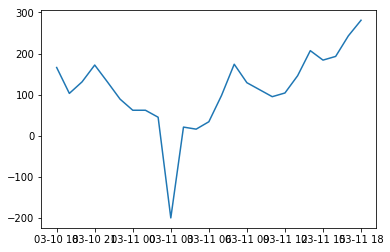

In [3]:
import numpy as np
import pickle
from pandas.plotting import register_matplotlib_converters

# для нормального отображения индексов pandas на графике
register_matplotlib_converters()
# берём  первые 25 точек из pandas.DataFrame
TOP=25
# доступ к Figure и Subplot
fig, subplot = plt.subplots()
# формируем значения по оси  X
x_ticks = air_df['ts'].values[:TOP]
# формируем значения по оси Y
y_ticks = air_df['NOx(GT)'].values[:TOP]
# график функции
subplot.plot(x_ticks, y_ticks)
# сохраняем для дальнейшего использования
plt.savefig('air_quality.png')

Нарисуем картинку, которую мы сохранили с помощью кода
<pre>
![title](air_quality.png)
</pre>

![title](air_quality.png)